# Sentiment Classifier Evaluation

# Goal:

My goal in this challenge is to compare the performance of the orginal classifier against five different versions.

I will use the IMDB dataset from the UC Irvine's [Sentiment Labelled Sentences](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences), to iterate features and tune parameters of our data.

**Questions**

- Do any of your classifiers seem to overfit?
- Which seem to perform the best? Why?
- Which features seemed to be most impactful to performance?

In [2]:
# Loading the packages
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os 
path = "/home/kaneeshadawood/imdb_labelled.txt"

In [4]:
# Loading the dataset:
data_path = ("/home/kaneeshadawood/imdb_labelled.txt")
data = pd.read_csv(data_path, delimiter= '\t', header=None)

#Score is either 1 (for positive) or 0 (for negative)
data.columns = ['review', 'score']

# Let's choose some keywords and add spaces around the key so we're getting the word and not pattern matching.

keywords = ['good', 'great', 'fun', 'recommended', 'amazing', 'excellent', 'wonderful', 'adorable', 'decent', 'hilarious',
            'right', 'cool', 'awesome', 'interesting', 'superb', 'perfect']

for key in keywords:
    data[str(key)] = data.review.str.contains(' ' + str(key) + ' ', case=False)
    data[str(key)] = data.review.str.contains((str(key) + ' '), case=False)
    data[str(key)] = data.review.str.contains((' ' + str(key)), case=False)
    
# Let's find if all the reviews are uppercase:
data['allcaps'] = data.review.str.isupper() 

# Let's now convert the score columns into a Boolean value to perform statistics:
data['score'] = (data['score'] == 1)

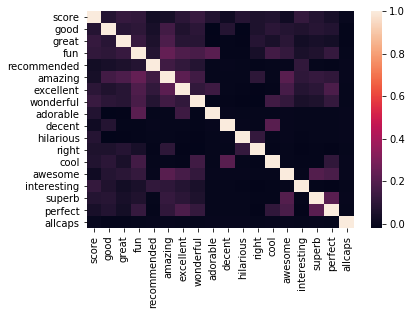

In [5]:
sns.heatmap(data.corr())

In [6]:
# Using the titles 'value' and 'target' to specify x and y variables

value = data[keywords + ['allcaps']]
target = data['score']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(value, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(value)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 274


Given that there are 295 mislabelled points in our dataset, let us now calculate the accuracy score of our model to analyze the performance of the classifier. 

In [7]:
# Calculating the accuracy of the model:
from sklearn.metrics import accuracy_score

accuracy_score(target, y_pred)

0.6336898395721925

Now, let's assign new features to analyze the performance of our classifier through the confusion matrix.

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[338,  24],
       [250, 136]])

Here we learn that 250 out of 274 errors are incorrectly classified messages. 

Let us now dive into calculating the sensitivity and specificity of our classifier.

In [9]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(y_pred)): 
        if target[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and target[i]!=y_pred[i]:
           FP += 1
        if target[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and target[i]!=y_pred[i]:
           FN += 1

In [10]:
#Sensitivity - positive correctly identified:
target_pos = 0
for i in range(len(target)): 
        if target[i]== 1:
           target_pos += 1
print('Sensitivity is: {}'.format(100*TP/target_pos))

Sensitivity is: 35.233160621761655


In [11]:
print('accuracy is: {}'.format((TN+TP)*100/(TP+TN+FP+FN)))

accuracy is: 63.36898395721925


In [12]:
#Specificity - negatives correctly identified
target_neg = 0
for i in range(len(target)): 
        if target[i]== 0:
           target_neg += 1
print('Specificity is: {}'.format(100*TN/target_neg))

Specificity is: 93.37016574585635


**Holdout Groups**

In [13]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(value, target, test_size=0.2, random_state=20)
print('With 50% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(value, target).score(value, target)))


With 50% Holdout: 0.6
Testing on Sample: 0.6336898395721925


**Cross Validation**

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, value, target, cv=10)

array([0.61842105, 0.59210526, 0.64      , 0.65333333, 0.64      ,
       0.64      , 0.63513514, 0.60810811, 0.60810811, 0.60810811])

Now let's try identifying the negative messages instead of the positives.

In [15]:
negatives = ['bad', 'terrible', 'dissapointed', 'worse', 'worst', 'sad', 'broken','damaged', 'defective', 'slow', 'problems', 'wasted',
             'hate', 'unacceptible']

for i in negatives:
    data[str(i)] = data.review.str.contains((' ' + str(i) + ' '), case=False)
    data[str(i)] = data.review.str.contains((str(i) + ' '), case=False)
    data[str(i)] = data.review.str.contains((' ' + str(i)), case=False)
    data[str(i)] = data.review.str.contains((str(i)), case=False)

In [16]:
data['score'] = (data['score'] == 0)
data.head()

,review,score,good,great,fun,recommended,amazing,excellent,wonderful,adorable,...,worst,sad,broken,damaged,defective,slow,problems,wasted,hate,unacceptible
0,"A very, very, very slow-moving, aimless movie ...",True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,Not sure who was more lost - the flat characte...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


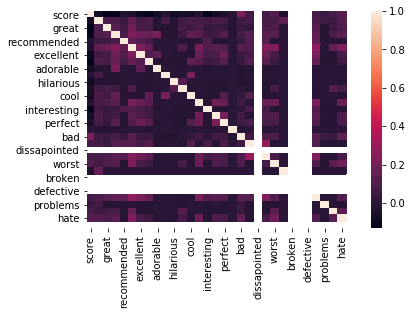

In [17]:
sns.heatmap(data.corr())

In [19]:
value_n = data[negatives]
target_n = data['score']

# Instantiate our model and store it in a new variable.
bnb_n = BernoulliNB()
# Fit our model to the data.
bnb_n.fit(value_n, target_n)
# Classify, storing the result in a new variable.
y_pred_n = bnb_n.predict(value_n)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    value_n.shape[0],
    (target_n != y_pred_n).sum()
))

Number of mislabeled points out of a total 748 points : 287


In [20]:
# Confusion Matrix
confusion_matrix(target_n, y_pred_n)

array([[377,   9],
       [278,  84]])

In [21]:
TP_n = 0
FP_n = 0
TN_n = 0
FN_n = 0
for i in range(len(y_pred_n)): 
        if target_n[i]==y_pred_n[i]==0:
           TP_n += 1
        if y_pred_n[i]==1 and target_n[i]!=y_pred_n[i]:
           FP_n += 1
        if target_n[i]==y_pred_n[i]==1:
           TN_n += 1
        if y_pred_n[i]==0 and target_n[i]!=y_pred_n[i]:
           FN_n += 1

In [22]:
#Sensitivity - positive correctly identified:
target_pos_n = 0
for i in range(len(target_n)): 
        if target_n[i]== 1:
           target_pos_n += 1
print('Sensitivity is: {}'.format(100*TP_n/target_pos_n))

Sensitivity is: 104.14364640883979


In [23]:
# Accuracy Score
accuracy_score(target, y_pred)

0.3663101604278075

In [24]:
#Specificity - negatives correctly identified
#Score is either 1 (for positive) or 0 (for negative)
target_neg_n = 0
for i in range(len(target_n)): 
        if target_n[i]== 1:
           target_neg_n += 1
print('Specificity is: {}'.format(100*TN_n/target_neg_n))

Specificity is: 23.204419889502763


# Summary

- Accuracy for positive keywords are 63.4% whereas, bad reviews show an accuracy of 36.7%

- Our first model gives a higher specificity score (93.4%) than our second model (23.2%). The second model is more sensitive than the first model (104.14% > 23.2%)